In [ ]:
!pip install distance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 180 kB 4.5 MB/s 
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16276 sha256=073662be731525283ecb70e7474a8f2cc3a249c1596e7be2438a23152dc4c6f1
  Stored in directory: /root/.cache/pip/wheels/b2/10/1b/96fca621a1be378e2fe104cfb0d160bb6cdf3d04a3d35266cc
Successfully built distance


In [ ]:
!pip install yake
!pip install tika

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 3.2 MB/s 
     |████████████████████████████████| 132 kB 10.3 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73979 sha256=112aa7e9ca5c58d7233b06ab1face6291acc49bd1bdad6a62b828f765aebac3b
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32893 sha256=7b1d8a3a2641d2ab692b5ee59b3e50bc0bb6864331898f70e2de2c74e2ee2f7f
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika


In [ ]:
import pandas as pd
import numpy as np
import os
import spacy
import yake
from tika import parser
import matplotlib.pyplot as plt 
import spacy

In [ ]:
cd ..

/content


In [ ]:
cd drive/MyDrive/CySyphus Master Documents/Scraped Files/Cysyphus Phase 1/NIST(1-100)

/content/drive/MyDrive/CySyphus Master Documents/Scraped Files/Cysyphus Phase 1/NIST(1-100)


In [ ]:
kw_extractor = yake.KeywordExtractor() 
language = "en"
max_ngram_size = 2 
deduplication_threshold = 0.3
numOfKeywords = 20 
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, 
                                            dedupLim=deduplication_threshold, top=numOfKeywords, features=None)

In [ ]:
folders = os.listdir()

## Creating the keyword list for each category 

Takes about 2 hours and 42 minutes to run

In [ ]:
for f in folders:
  if os.path.isdir(f):
    word_list = []
    documents = os.listdir(f)
    for document in documents:
      if document.endswith('.pdf'):
        try:
          raw = parser.from_file('{}/{}'.format(f,document))
          keywords = custom_kw_extractor.extract_keywords(raw['content'].lower())
          word_list.append(keywords)
        except:
          continue
    word_dic = {}

    for ls in word_list:
      for (word,score) in ls:
        if word not in word_dic:
          word_dic[word]=1
        else:
          word_dic[word]+=1
    df = pd.DataFrame.from_dict(word_dic, orient='index',columns=['Count'])
    df = df.sort_values('Count',ascending=False)
    df.to_excel('Keywords/{}.xlsx'.format(f))

## Aggregate study

In [ ]:
cd ..

/content/drive/MyDrive/CySyphus Master Documents/Scraped Files/Cysyphus Phase 1/NIST(451-500)/Keywords


In [ ]:
cd Keywords

/content/drive/MyDrive/CySyphus Master Documents/Scraped Files/Cysyphus Phase 1/NIST(1-100)/Keywords


In [ ]:
colnames=['Word','Count']
reports = os.listdir()
df = pd.read_excel(reports[0],names=colnames)
for x in reports[1:]:
  df1 = pd.read_excel(x,names=colnames)
  df = pd.concat([df, df1]).groupby(['Word']).sum().reset_index()
df = df.sort_values('Count',ascending=False)

In [ ]:
df.head()

,Word,Count
6555,data,2405.0
21106,security,2032.0
12295,information,1713.0
20356,risk,1496.0
23291,systems,1386.0


In [ ]:
len(df)

26467

### Reduction

In [ ]:
words = df[df['Count']>20]['Word'].to_list() #The word needs to occur atleast 20 times to be considered a category

In [ ]:
len(words)

803

803 words occur atleast 20 times. We can incorporate clustering to further reduce this. We should keep the folder name as the category as well.

In [ ]:
from sklearn.cluster import AffinityPropagation
import distance
  

words = np.asarray(words) #So that indexing with a list will work
lev_similarity = -1*np.array([[distance.levenshtein(w1,w2) for w1 in words] for w2 in words])

In [ ]:
w={}
affprop = AffinityPropagation(affinity="precomputed", damping=0.6)
affprop.fit(lev_similarity)
for cluster_id in np.unique(affprop.labels_):
    exemplar = words[affprop.cluster_centers_indices_[cluster_id]]
    cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
    cluster_str = ", ".join(cluster)
    w[exemplar] = cluster_str 

In [ ]:
related = []
for word in w:
  related.append([w[word]])

In [ ]:
f = pd.DataFrame(list(w.keys()), columns=['Word'])
f['Related_Words'] = related

In [ ]:
f.head()

,Word,Related_Words
0,access,"[acceptable, access, access denied, accessed, ..."
1,cybersecurity,"[cloud security, cyber security, cybersecurity..."
2,program,"[european, program, programme, programming, pr..."
3,technology,"[technical, techniques, technologies, technology]"
4,control,"[access control, central bank, centre, control..."


In [ ]:
f.to_excel('Attempt_1.xlsx')

## Entire corpus

In [ ]:
cd ..

/content/drive/MyDrive/CySyphus Master Documents/Scraped Files/Cysyphus Phase 1


In [ ]:
folders = os.listdir()
folders

['NIST(551-600)',
 'NIST(1-100)',
 '.ipynb_checkpoints',
 'NIST(101-150)',
 'NIST(151-200)',
 'NIST(201-250)',
 'NIST(251-300)',
 'NIST(301-350)',
 'NIST(351-400)',
 'NIST(401-450)',
 'NIST(451-500)',
 'NIST(501-550)',
 'NIST(601-650)',
 'NIST(651-700)',
 'NIST Glossary .xlsx',
 'NIST(701-730)',
 'Prototype1.4_DataPool_Scaled.pdf',
 'Scraper_Test_03 18.ipynb',
 'Entire_corpus.xlsx']

In [ ]:
i=0
df = pd.DataFrame()
for folder in folders:
  if folder.startswith('NIST('):    
    files = os.listdir('{}/Keywords'.format(folder))
    for f in files:
      if f.endswith('.xlsx') and f != 'Attempt_1.xlsx':
        df1 = pd.read_excel('{}/Keywords/{}'.format(folder,f),names=colnames)
        df = pd.concat([df, df1]).groupby(['Word']).sum().reset_index()
df = df.sort_values('Count',ascending=False)

In [ ]:
df.head()

,Word,Count
23225,data,16291.0
44884,information,14064.0
77707,security,13875.0
74858,risk,11783.0
85731,systems,11093.0


In [ ]:
len(df)

97618

In [ ]:
df.to_excel('Entire_corpus.xlsx')

In [ ]:
df1 = df[df['Count']>500]
len(df1)

205

In [ ]:
df1.to_excel('Frequent_words.xlsx')

In [ ]:
words = df1['Word'].to_list()

words = np.asarray(words) #So that indexing with a list will work
lev_similarity = -1*np.array([[distance.levenshtein(w1,w2) for w1 in words] for w2 in words])

w={}
affprop = AffinityPropagation(affinity="precomputed", damping=0.6)
affprop.fit(lev_similarity)
for cluster_id in np.unique(affprop.labels_):
    exemplar = words[affprop.cluster_centers_indices_[cluster_id]]
    cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
    cluster_str = ", ".join(cluster)
    w[exemplar] = cluster_str 

In [ ]:
related = []
for word in w:
  related.append([w[word]])

In [ ]:
f = pd.DataFrame(list(w.keys()), columns=['Word'])
f['Related_Words'] = related

In [ ]:
f.head()

,Word,Related_Words
0,risk,"[cisa, grid, group, risk, risks]"
1,network,"[framework, network, networks, password, work]"
2,access,"[acceptable, access, address, analysis, business]"
3,cybersecurity,"[cyber security, cybersecurity, cybersecurity ..."
4,program,"[european, program, programs]"


In [ ]:
f.to_excel('Clustered_words.xlsx')

### Top keywords

In [ ]:
overall30 = df.head(40) #Change here for more keywords

In [ ]:
overall30.head()

,Word,Count
6555,data,2405
21106,security,2032
12295,information,1713
20356,risk,1496
23291,systems,1386


### Bar Chart

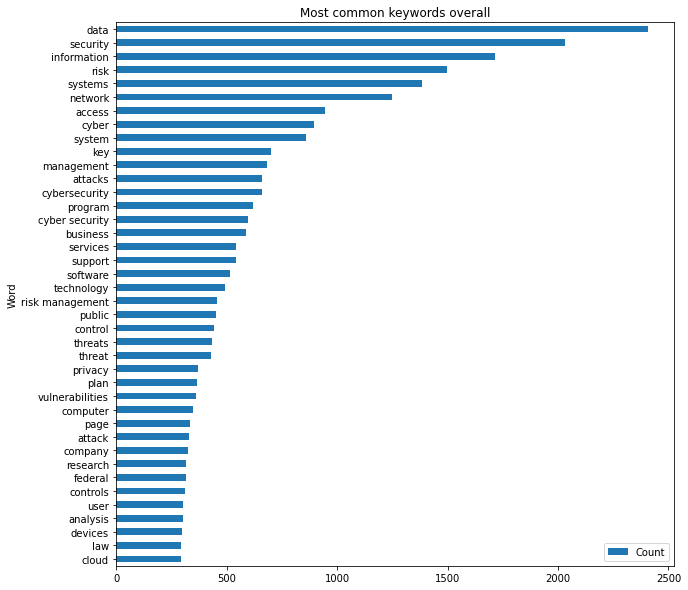

In [ ]:
overall30.plot.barh(x='Word', y='Count', rot=0, figsize=(10, 10))
plt.gca().invert_yaxis()
plt.title('Most common keywords overall')
plt.show()

# Individual category

I picked a random category for the analysis - 

In [ ]:
reports[23]

'Reports(NIST1-100)attacker.xlsx'

In [ ]:
df = pd.read_excel(reports[35],names=colnames)
df.head()

,Word,Count
0,risk,38
1,information,24
2,data,23
3,systems,18
4,access,18


In [ ]:
cat30 = df.head(30)

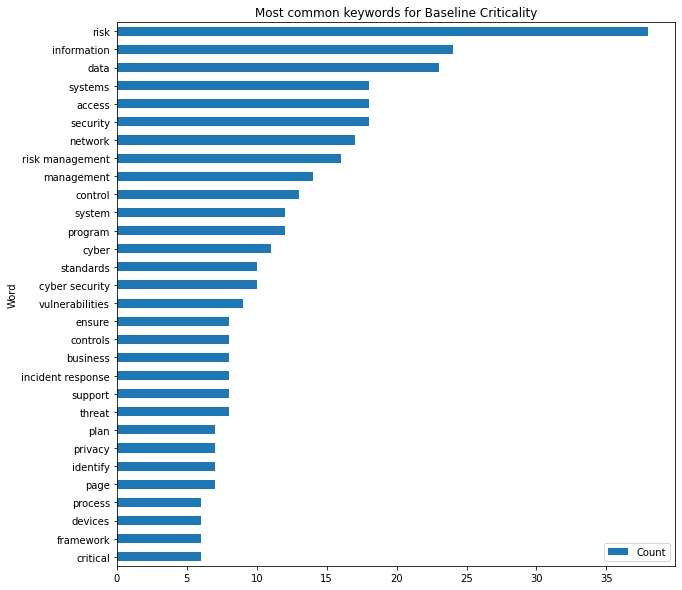

In [ ]:
cat30.plot.barh(x='Word', y='Count', rot=0, figsize=(10, 10))
plt.gca().invert_yaxis()
plt.title('Most common keywords for Baseline Criticality')
plt.show()